In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\Project_MP\Log\data_loader.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Sampling_Data\Smote_dataset.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19350 entries, 0 to 19349
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19350 non-null  int64  
 1   id                   19350 non-null  float64
 2   ref                  19350 non-null  float64
 3   subtitle             19350 non-null  float64
 4   creatorname          19350 non-null  float64
 5   totalbytes           19350 non-null  float64
 6   lastupdated          19350 non-null  float64
 7   downloadcount        19350 non-null  float64
 8   title                19350 non-null  float64
 9   tags                 19350 non-null  float64
 10  anomaly              19350 non-null  float64
 11  download_view_ratio  19350 non-null  float64
 12  num_tags             19350 non-null  float64
 13  title_length         19350 non-null  float64
 14  subtitle_length      19350 non-null  float64
 15  creator_popularity   19350 non-null 

# --- SHAP explanation ---

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


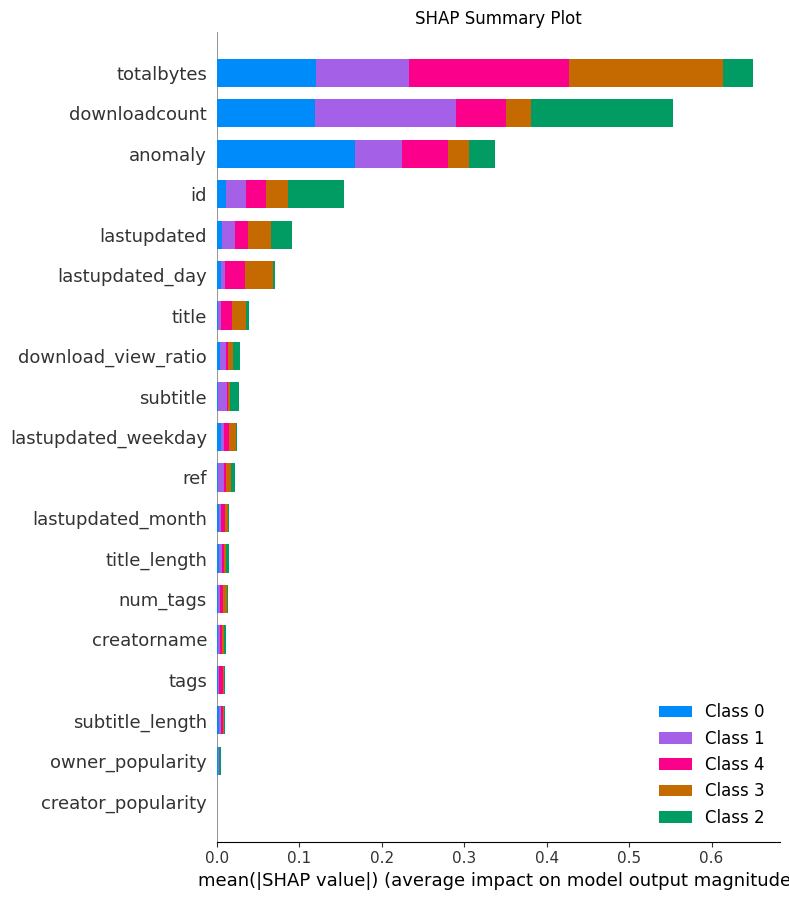

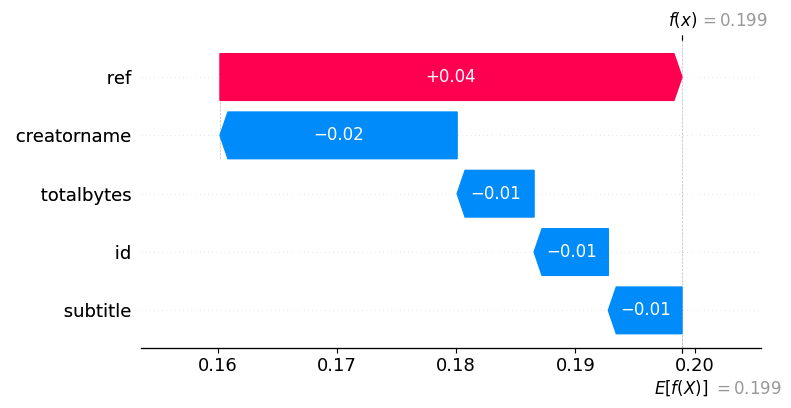

In [3]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --- Ma'lumotni tayyorlash ---
X = df.drop(columns=['Unnamed: 0', 'cluster'])  # features
y = df['cluster']  # target

# --- Train/Test split (agar kerak bo'lsa) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model yaratish va fit qilish ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --- SHAP explainer yaratish ---
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# --- Summary plot ---
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test, plot_type="bar")

# --- Waterfall plot uchun bitta misol (testdagi birinchi sample) ---
# RandomForestClassifier ko'pklass bo'lgani uchun shap_values har bir class uchun alohida bo'ladi
# Faraz qilamiz class 0 uchun
class_index = 0  
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[class_index], shap_values[class_index][0], X_test.iloc[0])
plt.show()


# 📊 SHAP Summary Plot Tahlili

Bu SHAP summary plot modeldagi xususiyatlarning ahamiyatini ko‘rsatadi. Quyidagi xulosalarni chiqarish mumkin:

## 🌟 Eng muhim xususiyatlar
- **totalbytes** 💾 – model natijasiga eng katta ta’sir qiluvchi faktor.
- **downloadcount** ⬇️ – ikkinchi eng muhim o‘zgaruvchi.
- **anomaly** ⚠️ – model qarorlariga sezilarli ta’sir ko‘rsatadi.

## ⚖️ O‘rta darajadagi ahamiyatga ega xususiyatlar
- **id** 🆔, **lastupdated** 📅, **lastupdated_day** 🗓 – ma’lumotlarni aniqlash yoki vaqtga bog‘liq o‘zgaruvchilar, ular ham modelga sezilarli darajada ta’sir qiladi.

## 💤 Kam ahamiyatli xususiyatlar
- **title** 🏷, **subtitle** ✏️, **download_view_ratio** 📉, **subtitle_length** 📏, **owner_popularity** 🌟, **creator_popularity** 🌟 – bu xususiyatlar model chiqishiga juda kam ta’sir qiladi.

## 🎨 Sinflar ta’siri
- Ranglar orqali ko‘rinib turibdiki, **totalbytes** 💾 va **downloadcount** ⬇️ bir nechta sinflarga (Class 0, Class 1, Class 4, Class 3, Class 2) ta’sir ko‘rsatadi.
- Ba’zi kichik xususiyatlar faqat ayrim sinflar bilan bog‘liq.

## 📝 Umumiy xulosa
Model natijalariga eng ko‘p ta’sir qiluvchi xususiyatlar:
1. Fayl hajmi (**totalbytes**) 💾  
2. Yuklab olish soni (**downloadcount**) ⬇️  
3. Anomalilar (**anomaly**) ⚠️  

Kichik va kam ahamiyatli xususiyatlar modelni soddalashtirish va optimallashtirish uchun e’tibordan chetda qoldirilishi mumkin.

> 🔹 Agar xohlansa, ushbu plotning eng muhim **5 ta xususiyatga fokuslangan soddalashtirilgan versiyasini** ham tayyorlab berish mumkin.
